In [1]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
class cricketState(TypedDict):
    runs:int
    balls: int 
    fours:int 
    sixs:int
    bpb : float
    sr:float
    summary: str 


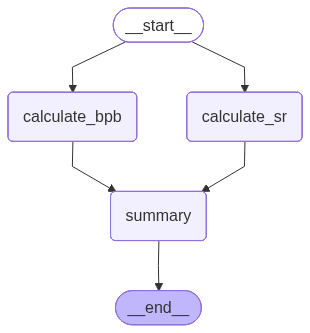

In [3]:
def calulate_sr(state: cricketState) -> cricketState:
    return {"sr" :100.0 }


def calculate_bpb(state: cricketState) -> cricketState:
    return {"bpb":1.0}

def summary(state: cricketState) -> cricketState:
    
    return {"summary":"This is the summary"}

# model = ChatOpenAI(model="gpt-4o-mini")

graph = StateGraph(cricketState)


graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_sr", calulate_sr)
graph.add_node("summary",summary)



graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_sr")
graph.add_edge("calculate_sr", "summary")
graph.add_edge("calculate_bpb","summary")
graph.add_edge("summary",END) 
graph.compile()

In [5]:
ini_state={ 
    "runs":100,
    "balls": 100, 
    "fours":10, 
    "sixs":1,
    "bpb" : 0.0,
    "sr":0.0,
    "summary": "" }

workflow=graph.compile()
final_state=workflow.invoke(ini_state)

In [6]:
final_state

{'runs': 100,
 'balls': 100,
 'fours': 10,
 'sixs': 1,
 'bpb': 1.0,
 'sr': 100.0,
 'summary': 'This is the summary'}

In [7]:
ini_state

{'runs': 100,
 'balls': 100,
 'fours': 10,
 'sixs': 1,
 'bpb': 0.0,
 'sr': 0.0,
 'summary': ''}